11
12
13
9
14
10
1
2
3
4
5
6
hola7


geom       (POLYGON ((277730.8063622636 4451386.259075009...
parcela                                                    7
Name: 12, dtype: object

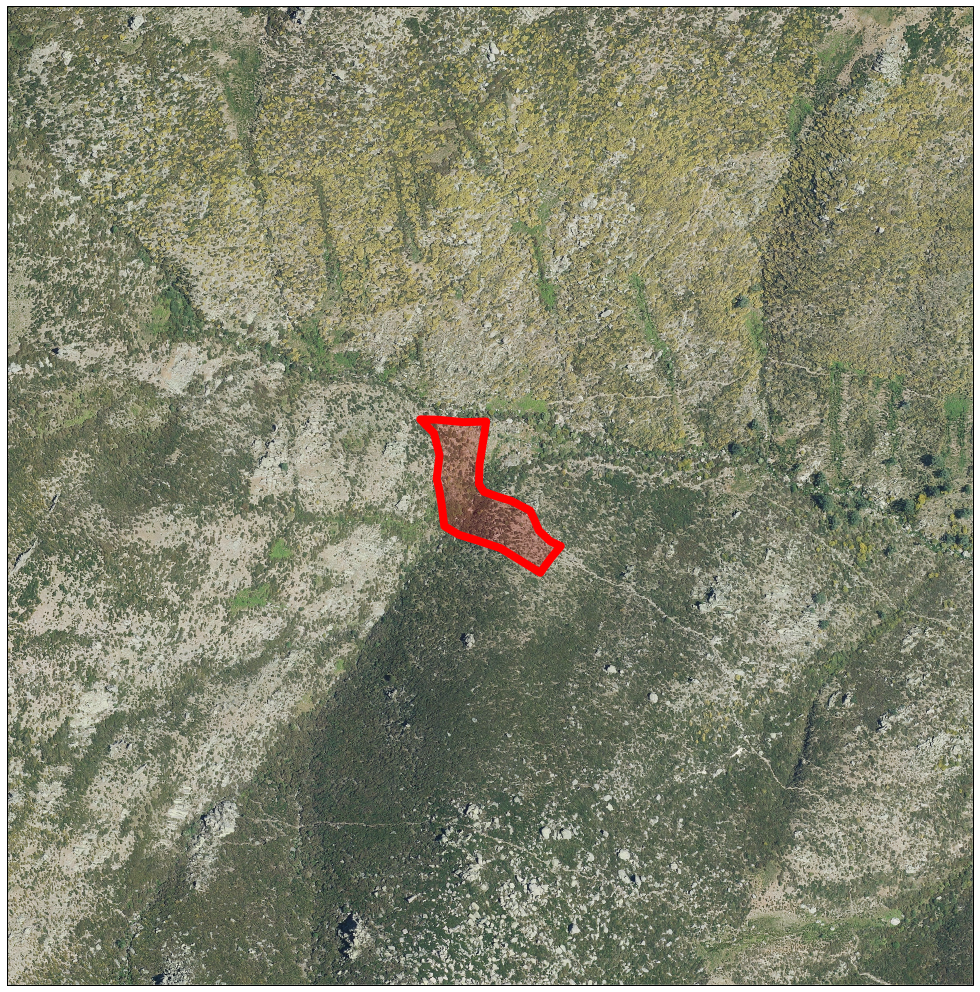

hola8


geom       (POLYGON ((277670.9179657311 4451554.898177275...
parcela                                                    8
Name: 13, dtype: object

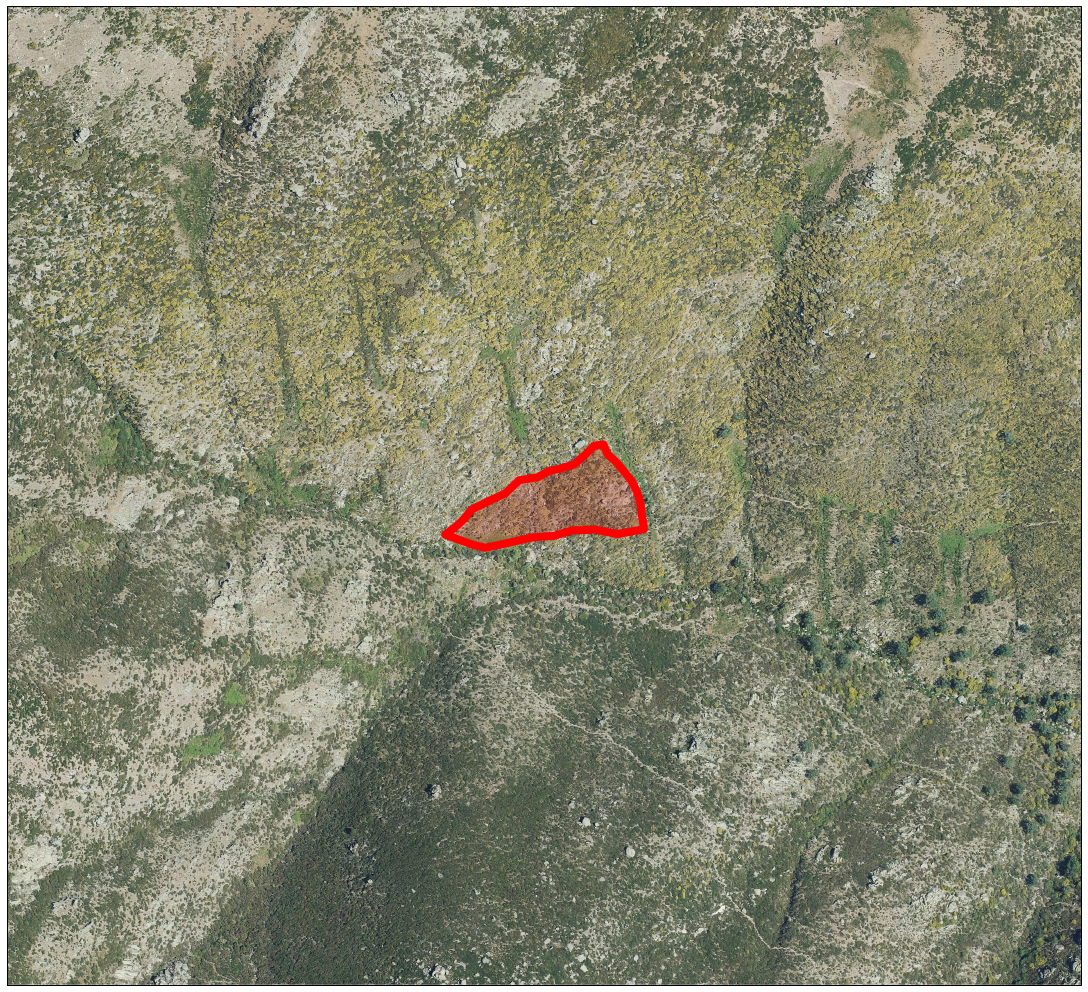

In [21]:
import psycopg2
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from config import config
from osgeo import gdal
import matplotlib.patches as mpatches
import cartopy.crs as ccrs

params = config()
conn = psycopg2.connect(**params)

proj = ccrs.epsg('25830')
buffer = 400

zona = 'losar'
a = !ls static/images/parcela_quema_losar_orto*
b = list(map(lambda x: x.split('.')[0].split('_')[-1], a))

parcelas = gpd.read_postgis('select st_transform(geom, 25830) as geom, parcela from quema_{}_todas'.format(zona), conn)
for key, parcela in parcelas.iterrows():
    fig = plt.figure(figsize=(24,18))
    ax = plt.axes(projection=proj)
    lim = list(parcela.geom.bounds)
    display(parcela)
    ax.set_extent([lim[0] - buffer,lim[2] + buffer, lim[1] - buffer, lim[3] + buffer], crs=ccrs.epsg('25830'))
    ax.add_wms(wms='https://www.ign.es/wms-inspire/pnoa-ma', layers=['OI.OrthoimageCoverage'])

#     ax.add_wms(wms='https://www.ign.es/wms-inspire/mapa-raster', layers=['mtn_rasterizado'])

#         CURVAS DE NIVEL

#         gdal_data = gdal.Open('../BRUTOS/mdt/mdt_combinado_.tif')
#         gdal.Translate('static/prueba.tif', gdal_data, projWin = (lim[0] - buffer, lim[3] + buffer, lim[2] + buffer, lim[1] - buffer))

#         mdt = gdal.Open('static/prueba.tif')

#         data_array = mdt.ReadAsArray().astype(np.float)
#         mdt_array = np.flipud(data_array)

#         plt.subplot(ax)
#         ax.contour(mdt_array, cmap='terrain', levels = list(range(0,2500, 2)), 
#                    extent=(lim[0] - buffer, lim[2] + buffer, lim[1] - buffer, lim[3] + buffer))   

#         PARCELA

    ax.add_geometries(parcela.geom, facecolor=(0.8,0,0,0.2), edgecolor='red', linewidth=8, crs=ccrs.epsg('25830'))

    fig.savefig('static/images/parcela_quema_{}_orto_{}'.format(zona, parcela.parcela), bbox_inches='tight', pad_inches=0)
    plt.show()
    plt.close(fig)
conn.close()